In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
abnormal=pd.read_csv("/content/drive/MyDrive/NEW GMAIL ACC RELATED/ptbdb_abnormal.csv", header=None)
normal=pd.read_csv("/content/drive/MyDrive/NEW GMAIL ACC RELATED/ptbdb_normal.csv", header=None)

In [4]:
ptbdb=pd.concat([normal, abnormal])

In [5]:
#Finding the outliers
continous_features =   ptbdb[187].unique()
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            ptbdb.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(ptbdb[continous_features])

For the feature 0, No of Outliers is 424
For the feature 1, No of Outliers is 50


In [6]:
#Removing the outliers
outliers(ptbdb[continous_features], drop=True)

Outliers from 0 feature removed
Outliers from 1 feature removed


In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import resample
import random
import matplotlib.pyplot as plt
import seaborn as sns
ptbdb_lbl0 = resample(ptbdb[ptbdb[187]==0], replace=True, n_samples=15000, random_state=113)
ptbdb_lbl1 = resample(ptbdb[ptbdb[187]==1], replace=True, n_samples=15000, random_state=113)

In [9]:
ptbdb= pd.concat([ptbdb_lbl0, ptbdb_lbl1])

labels = ptbdb[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())

Count in each label: 
0    15000
1    15000
Name: 187, dtype: int64


In [10]:
from xgboost import XGBRFClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import std
from numpy import mean

In [11]:
x=ptbdb.iloc[:, 1:-1].values
y=ptbdb.iloc[:, -1].values
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [12]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [13]:
param = {
'max_depth': 5, # the maximum depth of each tree
'eta': 0.3, # the training step for each iteration
'silent': 1, # logging mode - quiet
'objective': 'multi:softprob', # error evaluation for multiclass training
'num_class': 5} # the number of classes that exist in this datset
num_round = 200 # the number of training iterations


In [14]:
bst = xgb.train(param, dtrain, num_round)

In [15]:
# make prediction
preds = bst.predict(dtest)
preds_rounded = np.argmax(preds, axis=1)
print(accuracy_score(y_test, preds_rounded))

0.9932323232323232


LEARNING CURVE

In [16]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [18]:
# fit model on training data
model = XGBClassifier()
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set,verbose=True)

[0]	validation_0-error:0.204129	validation_0-logloss:0.655654	validation_1-error:0.210606	validation_1-logloss:0.656075
[1]	validation_0-error:0.195025	validation_0-logloss:0.624031	validation_1-error:0.202525	validation_1-logloss:0.62481
[2]	validation_0-error:0.18995	validation_0-logloss:0.597707	validation_1-error:0.197475	validation_1-logloss:0.599206
[3]	validation_0-error:0.193035	validation_0-logloss:0.575001	validation_1-error:0.199697	validation_1-logloss:0.576851
[4]	validation_0-error:0.186119	validation_0-logloss:0.555533	validation_1-error:0.192626	validation_1-logloss:0.557799
[5]	validation_0-error:0.186667	validation_0-logloss:0.537452	validation_1-error:0.192626	validation_1-logloss:0.540417
[6]	validation_0-error:0.186617	validation_0-logloss:0.522538	validation_1-error:0.193131	validation_1-logloss:0.525699
[7]	validation_0-error:0.185672	validation_0-logloss:0.508629	validation_1-error:0.192424	validation_1-logloss:0.512201
[8]	validation_0-error:0.18602	validation_

XGBClassifier()

In [19]:
# make predictions for test data
predictions = model.predict(x_test)

In [20]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)

In [21]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

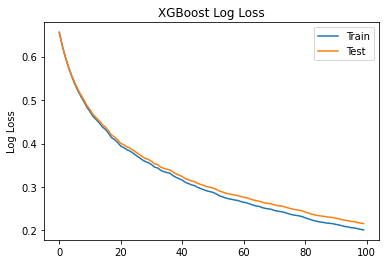

In [22]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

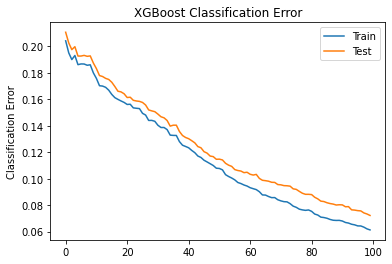

In [23]:
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()